<a href="https://colab.research.google.com/github/MedvedevaAlina27/arh_project/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962_%D0%98%D1%81%D0%BF%D0%BE%D0%BB%D1%8C%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B3%D0%BB%D1%83%D0%B1%D0%BE%D0%BA%D0%B8%D1%85_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%81%D0%B5%D1%82%D0%B5%D0%B9_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8_%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
target = raw_df.values[1::2, 2]

# Имена переменных из указанной части текста
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
y = target
# Создание DataFrame X с указанными именами столбцов
X = pd.DataFrame(data, columns=column_names)

# Вывод первых строк DataFrame X
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 1.2. Проектируем архитектуру для этой задачи

In [2]:
from keras.layers import Dense
from keras.models import Sequential


model = Sequential([
    Dense(28, input_shape=(14,), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28)                420       
                                                                 
 dense_1 (Dense)             (None, 1)                 29        
                                                                 
Total params: 449 (1.75 KB)
Trainable params: 449 (1.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [3]:
model.compile(optimizer='sgd', loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape

((404, 14), (102, 14))

In [5]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 2/10
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 3/10
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 4/10
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 5/10
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 6/10
13/13 [==============================] - 0s 3ms/step - loss: 596.4409 - mae: 22.6119
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 596.4409 - mae: 22.6119
Epoch 8/10
13/13 [==============================] - 0s 4ms/step - loss: 596.4409 - mae: 22.6119
Epoch 9/10
13/13 [==============================] - 0s 6ms/step - loss: 596.4409 - mae: 22.6119
Epoch 10/10
13/13 [==============================] - 0s 5ms/step - loss: 596.4409 - mae: 22.6119


In [6]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler()  # Масштабирование в диапазон 0-1

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
X_train

array([[0.00395381, 0.        , 0.21041056, ..., 0.98688789, 0.22638298,
        0.48222222],
       [0.00171339, 0.        , 0.37939883, ..., 0.94966968, 0.23120567,
        0.37111111],
       [0.00120232, 0.3       , 0.1638563 , ..., 0.98575319, 0.27375887,
        0.37777778],
       ...,
       [0.00162594, 0.        , 0.35007331, ..., 0.99397347, 0.24312057,
        0.31555556],
       [0.0025059 , 0.        , 0.23643695, ..., 0.98951031, 0.48425532,
        0.25777778],
       [0.00149286, 0.        , 0.13159824, ..., 1.        , 0.36765957,
        0.40222222]])

In [8]:
model = Sequential([
    Dense(28, input_shape=(14,), activation='relu'),
    Dense(14, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='sgd', loss='mse', metrics='mae')

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
13/13 [==============================] - 1s 27ms/step - loss: 721.8128 - mae: 21.9076 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 2/30
13/13 [==============================] - 0s 6ms/step - loss: 596.4409 - mae: 22.6119 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 3/30
13/13 [==============================] - 0s 6ms/step - loss: 596.4409 - mae: 22.6119 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 4/30
13/13 [==============================] - 0s 7ms/step - loss: 596.4409 - mae: 22.6119 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 5/30
13/13 [==============================] - 0s 7ms/step - loss: 596.4409 - mae: 22.6119 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 6/30
13/13 [==============================] - 0s 6ms/step - loss: 596.4409 - mae: 22.6119 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 7/30
13/13 [==============================] - 0s 7ms/step - loss: 596.4410 - mae: 22.6119 - val_loss: 575.1394 - val_mae: 22.2196
Epoch 8/30
13/13 [=============================

#### 1.6. Делаем предсказания на тестовых данных

In [9]:
preds = model.predict(X_test)

4/4 [==============================] - 0s 3ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [10]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

22.21960784313725

#### 1.8. Строим график обучения

In [11]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [12]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.9/307.9 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 8.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.2-py3-none-any.whl size

#### 2. Проверка обученной модели пользовательскими данными

In [13]:
def preprocess_input(features, scale_model="scaler.pkl"):

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [14]:
def predict_price(*features):

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [15]:
import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="CRIM", minimum=0, maximum=89, step=0.1, value=8.3252),
        gr.Slider(label="ZN", minimum=11.36, maximum=100, step=1, value=41.0),
        gr.Slider(label="INDUS", minimum=0.46, maximum=27.74, step=0.01, value=6.984127),
        gr.Slider(label="CHAS", minimum=0, maximum=1, step=0.01, value=0.2),
        gr.Slider(label="NOX", minimum=1, maximum=15000, step=1, value=322.0),
        gr.Slider(label="RM", minimum=0, maximum=1, step=0.1, value=2.555556),
        gr.Slider(label="AGE", minimum=2.9, maximum=100, step=0.1, value=37.88),
        gr.Slider(label="DIS", minimum=1.2, maximum=12.12, step=0.1, value=2),
        gr.Slider(label="RAD", minimum=1, maximum=24, step=0.1, value=12),
        gr.Slider(label="TAX", minimum=187, maximum=711, step=1, value=300),
        gr.Slider(label="PTRATIO", minimum=12.6, maximum=22, step=0.1, value=15),
        gr.Slider(label="B", minimum=0.32, maximum=396.9, step=0.1, value=130),
        gr.Slider(label="LSTAT", minimum=1.73, maximum=37.97, step=0.1, value=22),
        gr.Slider(label="MEDV", minimum=5, maximum=50, step=0.1, value=13),
    ],
    # Обновление при каждом изменении
    # live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)
# Запуск интерфейса
interface.launch(debug=False, share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://79af7a71b2c68d5bab.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [16]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [17]:
! pip install wldhx.yadisk-direct
! curl -L $(yadisk-direct https://disk.yandex.ru/d/_ftl0nxR_CW-6Q) -o archive.zip
! unzip -qq archive.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6498k  100 6498k    0     0  2312k      0  0:00:02  0:00:02 --:--:-- 3207k
fresh_pomegranates_done/fresh_pomegranate_289 — копия.jpg:  mismatching "local" filename (fresh_pomegranates_done/fresh_pomegranate_289 тАФ ╨║╨╛╨┐╨╕╤П.jpg),
         continuing with "central" filename version
fresh_pomegranates_done/fresh_pomegranate_290 — копия.jpg:  mismatching "local" filename (fresh_pomegranates_done/fresh_pomegranate_290 тАФ ╨║╨╛╨┐╨╕╤П.jpg),
         continuing with "central" filename version
fresh_pomegranates_done/fresh_pomegranate_291 — копия.jpg:  mismatching "local" filename (fresh_pomegranates_done/fresh_pomegranate_291 тАФ ╨║╨╛╨┐╨╕╤П.jpg),
         continuing with "central" filename version
fresh_pomegranates_done/fresh_pomegranate_292 — копия.jpg

### 3. Указываем путь к набору данных:

In [18]:
imagePaths = sorted(list(paths.list_images("/content")))
random.shuffle(imagePaths)

### 4. Загружаем набор данных и формируем общую выборку:

In [19]:
def load_images(imagePaths, compression_size = 32):

  data = []
  labels = []

  for imagePath in imagePaths:
    # Загрузка изображения
    image = cv2.imread(imagePath)

    # Изменение разрешения изображения (по умолчанию 32х32х3 -> 3072,)
    image = cv2.resize(image, (compression_size, compression_size)).flatten()

    # Добавление изображения в список
    data.append(image)

    # Извлечение метки класса из пути к изображению
    label = imagePath.split(os.path.sep)[-2]

    # Добавление метки в список
    labels.append(label)

  return data, labels

In [20]:
compression_size = 32

data, labels = load_images(imagePaths, compression_size)

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [21]:
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [22]:
(X_train, X_val, Y_train, Y_val) = train_test_split(data, labels,
                                                  test_size=0.25,
																									random_state=42)

In [23]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_val = lb.transform(Y_val)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [24]:
input_shape = (compression_size * compression_size * 3,)

In [25]:
model = Sequential()
model.add(Dense(1024, input_shape=input_shape, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [26]:
INIT_LR = 0.01
EPOCHS = 100

#### 5.3. Компилируем модель:

In [27]:
opt = Adam(learning_rate=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,
																					metrics=["accuracy"])

### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [29]:
H = model.fit(X_train, Y_train,
              validation_data=(X_val, Y_val),
              epochs=EPOCHS,
              batch_size=100,
              callbacks=[early_stopping, checkpoint])

Epoch 1/100
6/6 [==============================] - 1s 154ms/step - loss: 101.1471 - accuracy: 0.3274 - val_loss: 12.0324 - val_accuracy: 0.3511
Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 11.7581 - accuracy: 0.3700

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 1s 130ms/step - loss: 5.6671 - accuracy: 0.3470 - val_loss: 1.4233 - val_accuracy: 0.3617
Epoch 3/100
6/6 [==============================] - 1s 100ms/step - loss: 2.3092 - accuracy: 0.3203 - val_loss: 1.9916 - val_accuracy: 0.2872
Epoch 4/100
6/6 [==============================] - 1s 131ms/step - loss: 1.5343 - accuracy: 0.3932 - val_loss: 1.2048 - val_accuracy: 0.3723
Epoch 5/100
6/6 [==============================] - 1s 104ms/step - loss: 1.3061 - accuracy: 0.3719 - val_loss: 1.2619 - val_accuracy: 0.3564
Epoch 6/100
6/6 [==============================] - 0s 65ms/step - loss: 1.5030 - accuracy: 0.3630 - val_loss: 2.0609 - val_accuracy: 0.3670
Epoch 7/100
6/6 [==============================] - 0s 62ms/step - loss: 1.8118 - accuracy: 0.3434 - val_loss: 1.6582 - val_accuracy: 0.3670
Epoch 8/100
6/6 [==============================] - 0s 82ms/step - loss: 1.5167 - accuracy: 0.3861 - val_loss: 0.9997 - val_accuracy: 0.5585
Epoch 9/100
6/6 [===========

#### 6.3. Загружаем лучшую модель:

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [30]:
predictions = model.predict(X_val, batch_size=32)
print(classification_report(Y_val.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

6/6 [==============================] - 0s 8ms/step
                         precision    recall  f1-score   support

     fresh_peaches_done       1.00      0.62      0.77        66
fresh_pomegranates_done       0.76      0.90      0.82        68
fresh_strawberries_done       0.66      0.81      0.73        54

               accuracy                           0.78       188
              macro avg       0.81      0.78      0.77       188
           weighted avg       0.82      0.78      0.78       188



#### 7.2. Выведем матрицу ошибок

6/6 [==============================] - 0s 7ms/step


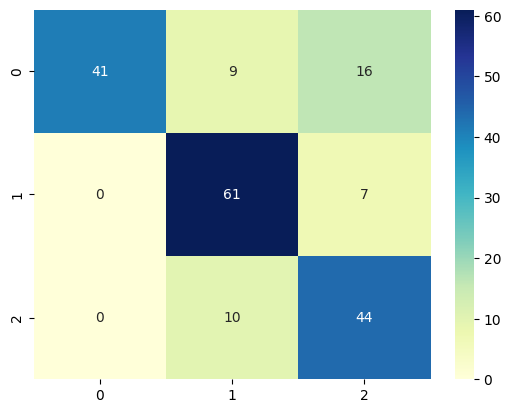

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(X_val, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = Y_val.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

#### 7.3. Отобразим график обучения

ValueError: x and y must have same first dimension, but have shapes (100,) and (41,)

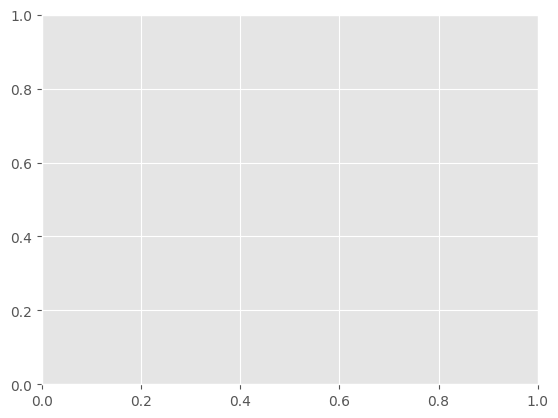

In [32]:
# строим графики потерь и точности
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')

### 8. Сохранение модели и меток классов:

In [33]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [34]:
model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### 9. Проверка обученной модели пользовательскими данными:

#### 9.1. Импортируем необходимые библиотеки

In [35]:
!pip install gradio

In [36]:
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [37]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 32):

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [38]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

### 10. Визуализируем интерфейс и произведем классификацию:

In [39]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
    examples=["/content/fresh_peaches_done/fresh_peach_114.jpg",
              "/content/fresh_pomegranates_done/fresh_pomegranate_118.jpg",
              "/content/fresh_strawberries_done/fresh_strawberry_115.jpg"])

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://7e939afeb0a2f95948.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
